In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
chernobylData = pd.read_csv('./data/Chernobyl_ Chemical_Radiation.csv',index_col='Date',parse_dates=True)
chernobylData.head()

,PAYS,Code,Location,Longitude,Latitude,I_131_(Bq/m3),Cs_134_(Bq/m3),Cs_137_(Bq/m3)
Date,,,,,,,,
1986-04-27,SE,1,RISOE,12.07,55.7,1,0,0.24
1986-04-28,SE,1,RISOE,12.07,55.7,0.0046,0.00054,0.00098
1986-04-29,SE,1,RISOE,12.07,55.7,0.0147,0.0043,0.0074
1986-04-29,SE,1,RISOE,12.07,55.7,0.00061,0,0.00009
1986-04-30,SE,1,RISOE,12.07,55.7,0.00075,0.0001,0.00028


In [3]:
chernobylData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2051 entries, 1986-04-27 to 1986-05-11
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PAYS            2051 non-null   object 
 1   Code            2051 non-null   int64  
 2   Location        2051 non-null   object 
 3   Longitude       2051 non-null   float64
 4   Latitude        2051 non-null   float64
 5   I_131_(Bq/m3)   2031 non-null   object 
 6   Cs_134_(Bq/m3)  1897 non-null   object 
 7   Cs_137_(Bq/m3)  1571 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 144.2+ KB


In [4]:
chernobylData.rename(columns={'I_131_(Bq/m3)': 'Iodine131','Cs_134_(Bq/m3)': 'Cesium134','Cs_137_(Bq/m3)': 'Cesium137'}, inplace=True)
chernobylData.head()

,PAYS,Code,Location,Longitude,Latitude,Iodine131,Cesium134,Cesium137
Date,,,,,,,,
1986-04-27,SE,1,RISOE,12.07,55.7,1,0,0.24
1986-04-28,SE,1,RISOE,12.07,55.7,0.0046,0.00054,0.00098
1986-04-29,SE,1,RISOE,12.07,55.7,0.0147,0.0043,0.0074
1986-04-29,SE,1,RISOE,12.07,55.7,0.00061,0,0.00009
1986-04-30,SE,1,RISOE,12.07,55.7,0.00075,0.0001,0.00028


In [5]:
chernobylData['PAYS'].value_counts()

IT    303
F     260
DE    246
AU    223
SE    211
CZ    134
NL    121
UK    119
FI    107
NO     73
BE     72
GR     60
ES     44
CH     42
IR     23
HU     13
Name: PAYS, dtype: int64

In [6]:
chernobylData['Location'].value_counts()

ISPRA                 101
KONALA(Helsinki)NW     79
CAPANNA                59
STOCKHOLM              58
VIENNA.                56
                     ... 
WALDHOF                 6
BANSKA                  6
MARCOULE                6
USTI                    5
GRAZ                    4
Name: Location, Length: 95, dtype: int64

In [7]:
chernobylData.isnull().sum()

PAYS           0
Code           0
Location       0
Longitude      0
Latitude       0
Iodine131     20
Cesium134    154
Cesium137    480
dtype: int64

In [8]:
chernobylData.replace({'AU': 'Austria','BE': 'Belgium','CH': 'Switzerland','CZ': 'Czechoslovakia','DE': 'Germany','ES': 'Spain','F': 'France','FI': 'Finland','GR': 'Greece','HU': 'Hungary','IR': 'Ireland','IT': 'Italy','NL': 'Netherlands','NO': 'Norway','SE': 'Sweden','UK': 'United Kingdom'},inplace=True)
chernobylData.head()

,PAYS,Code,Location,Longitude,Latitude,Iodine131,Cesium134,Cesium137
Date,,,,,,,,
1986-04-27,Sweden,1,RISOE,12.07,55.7,1,0,0.24
1986-04-28,Sweden,1,RISOE,12.07,55.7,0.0046,0.00054,0.00098
1986-04-29,Sweden,1,RISOE,12.07,55.7,0.0147,0.0043,0.0074
1986-04-29,Sweden,1,RISOE,12.07,55.7,0.00061,0,0.00009
1986-04-30,Sweden,1,RISOE,12.07,55.7,0.00075,0.0001,0.00028


In [9]:
chernobylData.drop(['Code'], axis=1, inplace=True)

In [10]:
chernobylData['PAYS'].value_counts()

Italy             303
France            260
Germany           246
Austria           223
Sweden            211
Czechoslovakia    134
Netherlands       121
United Kingdom    119
Finland           107
Norway             73
Belgium            72
Greece             60
Spain              44
Switzerland        42
Ireland            23
Hungary            13
Name: PAYS, dtype: int64

In [11]:
chernobylData['Location'].value_counts()

ISPRA                 101
KONALA(Helsinki)NW     79
CAPANNA                59
STOCKHOLM              58
VIENNA.                56
                     ... 
WALDHOF                 6
BANSKA                  6
MARCOULE                6
USTI                    5
GRAZ                    4
Name: Location, Length: 95, dtype: int64

In [12]:
chernobylData.fillna(np.NAN, inplace=True)

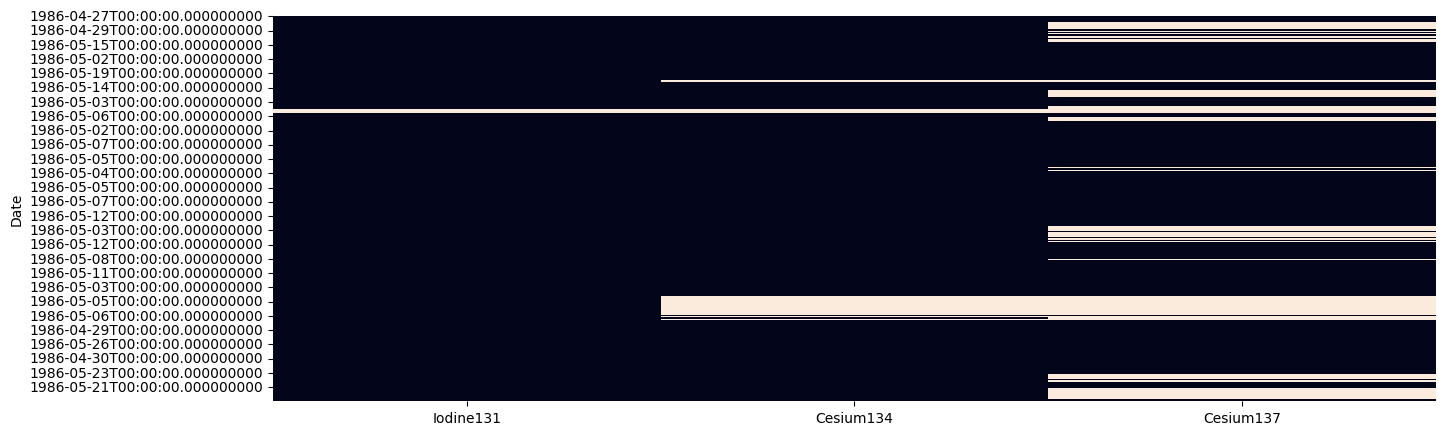

In [13]:
plt.figure(figsize=(15,5))
sns.heatmap(chernobylData[['Iodine131','Cesium134','Cesium137']].isnull(), cbar=False);plt.show()

In [14]:
chernobylData=chernobylData.fillna(np.NAN).replace('<',np.NAN).replace('L',np.NAN).replace('N',np.NAN)

In [15]:
chernobylData[['Cesium137','Cesium134','Iodine131']].astype('float64')
chernobylData[['Cesium137','Cesium134','Iodine131']] = chernobylData[['Cesium137','Cesium134','Iodine131']].apply(pd.to_numeric)

In [16]:
chernobylData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2051 entries, 1986-04-27 to 1986-05-11
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PAYS       2051 non-null   object 
 1   Location   2051 non-null   object 
 2   Longitude  2051 non-null   float64
 3   Latitude   2051 non-null   float64
 4   Iodine131  2009 non-null   float64
 5   Cesium134  1801 non-null   float64
 6   Cesium137  1506 non-null   float64
dtypes: float64(5), object(2)
memory usage: 128.2+ KB


In [17]:
avgData = chernobylData.groupby(['Date','Location','PAYS']).mean()

In [18]:
avgData.interpolate(method='linear', inplace=True)
avgData.head()

Longitude  Latitude  Iodine131  \
Date       Location           PAYS                                      
1986-04-27 RISOE              Sweden       12.07     55.70    1.00000   
1986-04-28 BERGEN             Norway       10.66     59.90    0.00020   
           KJELLER            Norway       10.66     59.90    0.12000   
           KONALA(Helsinki)NW Finland      25.00     60.13   18.54000   
           LJUNGBYHED         Sweden       13.92     56.82    1.40395   

                                       Cesium134  Cesium137  
Date       Location           PAYS                           
1986-04-27 RISOE              Sweden      0.0000   0.240000  
1986-04-28 BERGEN             Norway      0.0000   0.000000  
           KJELLER            Norway      0.0000   0.020000  
           KONALA(Helsinki)NW Finland     0.1243   0.238475  
           LJUNGBYHED         Sweden      0.2486   0.456950

In [19]:
avgData.isna().sum()

Longitude    0
Latitude     0
Iodine131    0
Cesium134    0
Cesium137    0
dtype: int64

In [20]:
avgData.reset_index(inplace=True)
avgData.head()

,Date,Location,PAYS,Longitude,Latitude,Iodine131,Cesium134,Cesium137
0,1986-04-27,RISOE,Sweden,12.07,55.70,1.00000,0.0000,0.240000
1,1986-04-28,BERGEN,Norway,10.66,59.90,0.00020,0.0000,0.000000
2,1986-04-28,KJELLER,Norway,10.66,59.90,0.12000,0.0000,0.020000
3,1986-04-28,KONALA(Helsinki)NW,Finland,25.00,60.13,18.54000,0.1243,0.238475
4,1986-04-28,LJUNGBYHED,Sweden,13.92,56.82,1.40395,0.2486,0.456950


In [21]:
avgData['Location'] = pd.Categorical(avgData['Location'])
avgData['PAYS'] = pd.Categorical(avgData['PAYS'])

In [22]:
avgData.sort_values(by=['Date'], inplace=True)

In [24]:
avgData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 1413
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1414 non-null   datetime64[ns]
 1   Location   1414 non-null   category      
 2   PAYS       1414 non-null   category      
 3   Longitude  1414 non-null   float64       
 4   Latitude   1414 non-null   float64       
 5   Iodine131  1414 non-null   float64       
 6   Cesium134  1414 non-null   float64       
 7   Cesium137  1414 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 83.6 KB
